# Capstone Project: Create a Customer Segmentation Report for Arvato Financial Services

In [18]:
# setting random state for reproducibility
random_state = 22

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from kmodes.kmodes import KModes

from sklearn.metrics import silhouette_score

## Part 3: Customer Segmentation Report

The main bulk of the analysis is in this part of the project.

In this notebook we'll use unsupervised learning techniques to describe the relationship between the demographics of the company's existing customers and the general population of Germany. By the end of this part, we'll be able to describe parts of the general population that are more likely to be part of the mail-order company's main customer base, and which parts of the general population are less so.

As explained in the previous notebook, the KModes model was chosen because our variables are categorical.

In [2]:
# load in the data
azdias = pd.read_csv('data/clean_AZDIAS.csv')
customers = pd.read_csv('data/clean_CUSTOMERS.csv')

del azdias['Unnamed: 0']
del customers['Unnamed: 0']

In [3]:
azdias.head()

,AGER_TYP,AKT_DAT_KL,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_TITEL,ARBEIT,BALLRAUM,CAMEO_DEUG_2015,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB,PRAEGENDE_JUGENDJAHRE_MAINSTREAM
0,2,1.0,1.0,0.0,0.0,3.0,0.0,4.0,-1.0,-1.0,...,2.0,3.0,3.0,2.0,9.0,-1.0,3,0,3,1
1,-1,5.0,1.0,0.0,0.0,1.0,0.0,3.0,5.0,3.0,...,6.0,7.0,4.0,6.0,4.0,7.0,3,1,4,0
2,-1,1.0,1.0,0.0,0.0,1.0,0.0,4.0,-1.0,-1.0,...,10.0,10.0,10.0,-1.0,-1.0,-1.0,3,0,3,0
3,-1,1.0,2.0,0.0,0.0,3.0,0.0,4.0,6.0,4.0,...,4.0,7.0,4.0,3.0,9.0,3.0,1,1,1,1
4,-1,1.0,12.0,0.0,1.0,0.0,0.0,4.0,4.0,8.0,...,6.0,9.0,10.0,-1.0,5.0,1.0,5,0,1,1


### Data pre-processing

As we tested on the previous notebook, we won't be performing any data preprocessing as KModes handles well the categorical variables.

### Modeling

Now it's time to start the modeling phase!

As we've already tested a couple approaches on the previous notebook, now it's time to implement the chosen model.

I've chose to use k=5 clusters because it showed an interesting cost value (the sum of all the dissimilarities between the clusters) after the observed elbow on k=2.

In [4]:
# Convert dataframes to matrix
azdiasMatrix = azdias.to_numpy()
customersMatrix = customers.to_numpy()

In [5]:
k = 5

In [6]:
kmodes = KModes(n_clusters = k, init = 'Huang', random_state = random_state)

#### AZDIAS

In [7]:
# train model
y_pred_azdias = kmodes.fit_predict(azdiasMatrix)

In [9]:
# create cluster column and add to the dataframe
azdias['cluster'] = kmodes.labels_

In [10]:
azdias.head()

,AGER_TYP,AKT_DAT_KL,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_TITEL,ARBEIT,BALLRAUM,CAMEO_DEUG_2015,...,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB,PRAEGENDE_JUGENDJAHRE_MAINSTREAM,cluster
0,2,1.0,1.0,0.0,0.0,3.0,0.0,4.0,-1.0,-1.0,...,3.0,3.0,2.0,9.0,-1.0,3,0,3,1,0
1,-1,5.0,1.0,0.0,0.0,1.0,0.0,3.0,5.0,3.0,...,7.0,4.0,6.0,4.0,7.0,3,1,4,0,2
2,-1,1.0,1.0,0.0,0.0,1.0,0.0,4.0,-1.0,-1.0,...,10.0,10.0,-1.0,-1.0,-1.0,3,0,3,0,0
3,-1,1.0,2.0,0.0,0.0,3.0,0.0,4.0,6.0,4.0,...,7.0,4.0,3.0,9.0,3.0,1,1,1,1,4
4,-1,1.0,12.0,0.0,1.0,0.0,0.0,4.0,4.0,8.0,...,9.0,10.0,-1.0,5.0,1.0,5,0,1,1,4


In [11]:
azdias.cluster.value_counts().sort_index()

0    31225
1    36305
2    57289
3    51239
4    46747
Name: cluster, dtype: int64

#### CUSTOMERS

In [12]:
# predict trained model on customers dataset
y_pred_customers = kmodes.predict(customersMatrix)

In [13]:
customers['cluster'] = y_pred_customers

In [14]:
customers.head()

,AGER_TYP,AKT_DAT_KL,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_TITEL,ARBEIT,BALLRAUM,CAMEO_DEUG_2015,...,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB,PRAEGENDE_JUGENDJAHRE_MAINSTREAM,cluster
0,0,1.0,3.0,0.0,0.0,1.0,0.0,4.0,7.0,6.0,...,2.0,1.0,6.0,9.0,2.0,3,1,4,0,3
1,-1,1.0,1.0,0.0,0.0,2.0,0.0,3.0,-1.0,-1.0,...,1.0,1.0,-1.0,-1.0,-1.0,3,1,2,0,0
2,1,1.0,1.0,0.0,0.0,1.0,0.0,2.0,4.0,3.0,...,4.0,2.0,6.0,9.0,2.0,4,0,4,0,3
3,-1,1.0,7.0,0.0,0.0,1.0,0.0,2.0,3.0,7.0,...,11.0,8.0,6.0,9.0,3.0,3,1,4,1,3
4,-1,1.0,1.0,0.0,0.0,2.0,0.0,3.0,-1.0,-1.0,...,1.0,1.0,-1.0,-1.0,-1.0,3,1,2,0,0


In [15]:
customers.cluster.value_counts().sort_index()

0    13404
1     2114
2    16351
3    15100
4      944
Name: cluster, dtype: int64

### Evaluating 

The `elbow method` is used to determine the k for KModes and it's also an evaluating metric.

### Interpreting the results

Now that we've got our clusters in the datasets, let's create a new dataset with the amount of indivuduals in each cluster for each of the datasets. This way we can make some plots to better visualize how they're distributed.

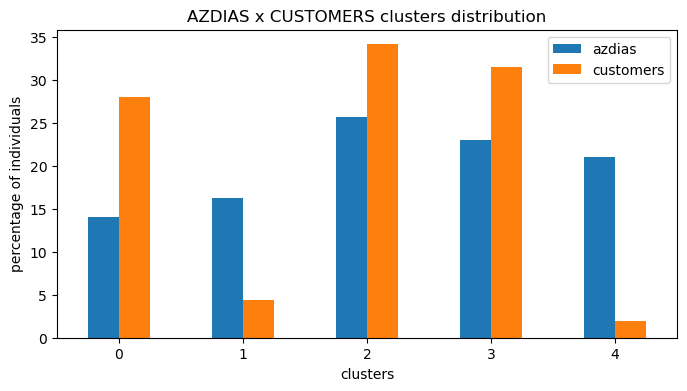

,azdias,customers
0,14.014497,27.975706
1,16.294518,4.412164
2,25.712619,34.126438
3,22.997240,31.515455
4,20.981127,1.970238


In [34]:
clusters_dict = {
    'azdias': azdias.cluster.value_counts().sort_index() / azdias.shape[0] *100,
    'customers': customers.cluster.value_counts().sort_index() / customers.shape[0] *100
}

df_clusters = pd.DataFrame(clusters_dict)

# making plot
ax = df_clusters.plot.bar(rot=0, figsize=(8,4))
ax.set_title('AZDIAS x CUSTOMERS clusters distribution')
ax.set_xlabel('clusters')
ax.set_ylabel('percentage of individuals')
plt.show()

df_clusters

Now we're talking!! Look at how significant that simple plot can be.

We can see clearly that clusters 0, 2 and 3 are a strong representation of our customers compared to the population.

Clusters 1 and 4 are the ones with less representativity of our customers.

With that in mind, let's get down to getting to know those clusters that best represent our customers so we can draw sort of a profile of them.

In [37]:
# columns for centroids
cluster_col = ['cluster']
cols = [col for col in azdias if col not in cluster_col]

# make index for cluster interpretation
index = ['cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4']

# make dataframe
df_clusters_centroids = pd.DataFrame(kmodes.cluster_centroids_, columns = cols, index = index)
df_clusters_centroids

,AGER_TYP,AKT_DAT_KL,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_TITEL,ARBEIT,BALLRAUM,CAMEO_DEUG_2015,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB,PRAEGENDE_JUGENDJAHRE_MAINSTREAM
cluster_0,-1.0,1.0,1.0,0.0,0.0,1.0,0.0,4.0,-1.0,-1.0,...,10.0,10.0,10.0,-1.0,-1.0,-1.0,3.0,0.0,3.0,0.0
cluster_1,-1.0,9.0,9.0,0.0,0.0,1.0,0.0,4.0,1.0,9.0,...,10.0,10.0,7.0,6.0,9.0,3.0,3.0,1.0,3.0,1.0
cluster_2,-1.0,1.0,1.0,0.0,0.0,1.0,0.0,3.0,6.0,4.0,...,3.0,6.0,5.0,6.0,9.0,7.0,1.0,1.0,3.0,1.0
cluster_3,-1.0,1.0,1.0,0.0,0.0,1.0,0.0,4.0,6.0,8.0,...,10.0,10.0,10.0,6.0,9.0,3.0,3.0,0.0,4.0,1.0
cluster_4,-1.0,9.0,2.0,0.0,0.0,1.0,0.0,4.0,6.0,6.0,...,9.0,8.0,10.0,6.0,9.0,3.0,4.0,0.0,1.0,1.0


In [55]:
azdias_centroids = df_clusters_centroids.loc[(df_clusters_centroids.index == 'cluster_1') | (df_clusters_centroids.index == 'cluster_4')]
customers_centroids = df_clusters_centroids.loc[(df_clusters_centroids.index == 'cluster_0') | (df_clusters_centroids.index == 'cluster_2') | (df_clusters_centroids.index == 'cluster_3') ]

In [74]:
centr_dict = {'population': list(azdias_centroids.mean()),
              'customers': list(customers_centroids.mean())}

In [75]:
df_centr = pd.DataFrame(centr_dict, columns = ['population', 'customers'], index = df_clusters_centroids.columns)

In [77]:
df_centr.head()

,population,customers
AGER_TYP,-1.0,-1.0
AKT_DAT_KL,9.0,1.0
ANZ_HAUSHALTE_AKTIV,5.5,1.0
ANZ_HH_TITEL,0.0,0.0
ANZ_KINDER,0.0,0.0


From those two datasets created above, we can see the demographic points for the centroids of each cluster, that way, if we examine each column we can see what kind of individuals are on clusters 0, 2 and 3 (most likely customers) and on clusters 1 and 4 (most likely not out customers).